In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
import pytesseract as tess
import os
tess.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [2]:
option = {
   'model': 'cfg/yolo.cfg',
   'load': 'bin/yolov2.weights',
   'threshold': 0.3
   }

tfnet = TFNet(option)

D:\MOVIE\darkflow\darkflow-master\darkflow\dark\darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.20477795600891113s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bn

In [3]:
path=r'D:\MOVIE\darkflow\darkflow-master\task-2'
print(os.listdir(path))

['frame_0 - Copy.jpg', 'frame_0.jpg', 'frame_1 - Copy.jpg', 'frame_1.jpg', 'frame_10.jpg', 'frame_11.jpg', 'frame_12.jpg', 'frame_13.jpg', 'frame_14.jpg', 'frame_15.jpg', 'frame_16.jpg', 'frame_17.jpg', 'frame_18.jpg', 'frame_19.jpg', 'frame_2 - Copy.jpg', 'frame_2.jpg', 'frame_20.jpg', 'frame_21.jpg', 'frame_22.jpg', 'frame_23.jpg', 'frame_24.jpg', 'frame_25.jpg', 'frame_26.jpg', 'frame_27.jpg', 'frame_28.jpg', 'frame_29.jpg', 'frame_3 - Copy.jpg', 'frame_3.jpg', 'frame_30.jpg', 'frame_31.jpg', 'frame_32.jpg', 'frame_33.jpg', 'frame_34.jpg', 'frame_35.jpg', 'frame_36.jpg', 'frame_37.jpg', 'frame_38.jpg', 'frame_39.jpg', 'frame_4 - Copy.jpg', 'frame_4.jpg', 'frame_40.jpg', 'frame_41.jpg', 'frame_42.jpg', 'frame_43.jpg', 'frame_44.jpg', 'frame_45.jpg', 'frame_46.jpg', 'frame_47.jpg', 'frame_48.jpg', 'frame_49.jpg', 'frame_5.jpg', 'frame_50.jpg', 'frame_51.jpg', 'frame_52.jpg', 'frame_53.jpg', 'frame_54.jpg', 'frame_55.jpg', 'frame_56.jpg', 'frame_57.jpg', 'frame_58.jpg', 'frame_59.jpg',

In [4]:
number_people=[]
for i in os.listdir(path):
    #print(i)
    filename=os.path.join(path,i)
    #print(filename)
    img=cv2.imread(filename)
    result=tfnet.return_predict(img)
    count=0
    for i in result:
        c=i['label']
        if c == 'person':
            count=count+1
    print(count)
    number_people.append(count)

0
0
1
1
3
0
0
2
1
0
2
2
2
2
0
0
3
4
1
1
1
0
3
4
5
4
0
0
4
5
4
3
4
4
5
3
2
2
0
0
4
2
2
3
2
1
2
2
0
1
0
1
2
1
2
2
1
0
1
1
4
0
0
1
2
1
0
2
2
0
2
1
1
0
0
1
0
2
5
4
1
2
1
1
1
0
0
1
1
0
0


In [5]:
number_people

[0,
 0,
 1,
 1,
 3,
 0,
 0,
 2,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 3,
 4,
 1,
 1,
 1,
 0,
 3,
 4,
 5,
 4,
 0,
 0,
 4,
 5,
 4,
 3,
 4,
 4,
 5,
 3,
 2,
 2,
 0,
 0,
 4,
 2,
 2,
 3,
 2,
 1,
 2,
 2,
 0,
 1,
 0,
 1,
 2,
 1,
 2,
 2,
 1,
 0,
 1,
 1,
 4,
 0,
 0,
 1,
 2,
 1,
 0,
 2,
 2,
 0,
 2,
 1,
 1,
 0,
 0,
 1,
 0,
 2,
 5,
 4,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0]

In [6]:
#import pytesseract as tess
#import os

#path=r'D:\MOVIE\darkflow\darkflow-master\task-2'

li=[]
tess.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

di=os.listdir(path)
print(len(di))

for i in range(len(di)):
    filename=os.path.join(path,di[i])
    img=cv2.imread(filename)
    crop=img[10:110,1400:1800]

    gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)

    ret, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)
    #img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ref=cv2.medianBlur(thresh,5)
    #print(img.shape)

    #cv2.imshow("image1", thresh)


    result=tess.image_to_string(ref)
    #print(result)
    li.append(result)
    #cv2.imshow('image',crop)
cv2.waitKey(0)


91


-1

In [7]:
li

['01 00°04 RM',
 '01 00°04 RM',
 '01-01 “08 PM',
 '01-01 “08 PM',
 '01.10.48 PM',
 '01:11:52 PM',
 '01:12:56 PM',
 '01:14:06 PM',
 '01:15:10 PM',
 '01:16:14 PM',
 '01:17:19 PM',
 '01:18:24 PM',
 '01:19:33 PM',
 '01:20:49 PM',
 '01 02°12 PM',
 '01 02°12 PM',
 '01 :21°53 PM',
 '01:22:58 PM',
 '01:24:09 PM',
 '01:25:46 PM',
 '01:26:51 PM',
 '01 28:36 PM',
 '01:29:42 PM',
 '01:30:46 PM',
 '01-31-50 PM',
 '01 32:54 PM',
 '01:03:17 PM',
 '01:03:17 PM',
 '01:33:59 PM',
 '01:35:03 PM',
 '01-3607 PM',
 '01 37712 RM',
 '01 38°16 RM',
 '01. 39°20 RM',
 '01: 40°24 RM',
 '01 417-29 PM',
 '01 42733 PM',
 '0143739 PM',
 '01:04:21 PM',
 '01:04:21 PM',
 '01 44743 PM',
 '01 45748 RM',
 '01 46752 RM',
 '01 47756 RM',
 '01:49°01 PRM',
 '01 50°05 RM',
 '01:51 °09 RM',
 '0152713 RM',
 '01 59724 PM',
 '01 54739 RM',
 '01:05:25 PM',
 '01 55743 RM',
 '01:°56°58 RM',
 '01 58702 RM',
 '01 59706 RM',
 '02:00°11 RM',
 '02 01715 PM',
 '02 02719 PM',
 '02 03°24 RM',
 '02 04728 PRM',
 '02: 05732 PM',
 '01:06:30 PM',


In [8]:
len(li)

91

In [9]:
import pandas as pd

In [49]:
df=pd.DataFrame(li,columns=['TIME'])
df['number of people']=pd.DataFrame(number_people)
df=df.head(10)
df

,TIME,number of people
0,01 00°04 RM,0
1,01 00°04 RM,0
2,01-01 “08 PM,1
3,01-01 “08 PM,1
4,01.10.48 PM,3
5,01:11:52 PM,0
6,01:12:56 PM,0
7,01:14:06 PM,2
8,01:15:10 PM,1
9,01:16:14 PM,0


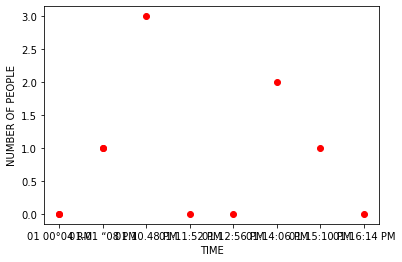

In [45]:
plt.xlabel('TIME')
plt.ylabel('NUMBER OF PEOPLE')
plt.scatter(df.TIME,df['number of people'],color='red')

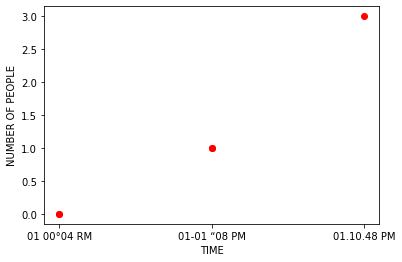

In [48]:
df=pd.DataFrame(li,columns=['TIME'])
df['number of people']=pd.DataFrame(number_people)
df=df.head(5)

plt.xlabel('TIME')
plt.ylabel('NUMBER OF PEOPLE')
plt.scatter(df.TIME,df['number of people'],color='red')
